In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
from keras.models import Sequential
from keras.layers import Convolution2D
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

K.set_learning_phase(1) #set learning phase

In [3]:
from CNN_analysis_helper import get_FASHION_MNIST_data

In [4]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'

In [5]:
x_train, x_valid, y_train_categorical, y_val_categorical = get_FASHION_MNIST_data(folder)

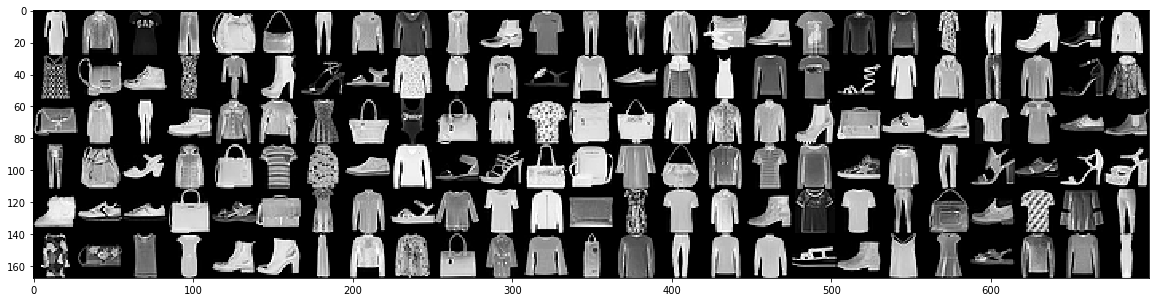

In [6]:
from MNIST_helper import plot_numbers
plot_numbers(x_train.reshape(-1,28,28),range(150), columns=25, figsize=(20, 20))

## Armo modelo de una capa muy simple

In [7]:
n_filters = 6
def get_simple_model(activation = None):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=(28,28,1), 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    return model
model = get_simple_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 6)         60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


## Imprimo dimensiones de los pesos

In [8]:
model.get_weights()[0].shape, model.get_weights()[1].shape

((3, 3, 1, 6), (6,))

In [9]:
# Matriz de 3x3
print(model.get_weights()[0][:,:,0,0])
print(model.get_weights()[1])

[[-0.19104609  0.29827002  0.25161693]
 [ 0.05430892 -0.23829722 -0.11315627]
 [-0.18004417 -0.0274348   0.11689785]]
[ 0.  0.  0.  0.  0.  0.]


In [10]:
from CNN_analysis_helper import plot_filter_coefs, plot_conv_filters, generate_random_image, plot_activations

## Filtros iniciados aleatoriamente

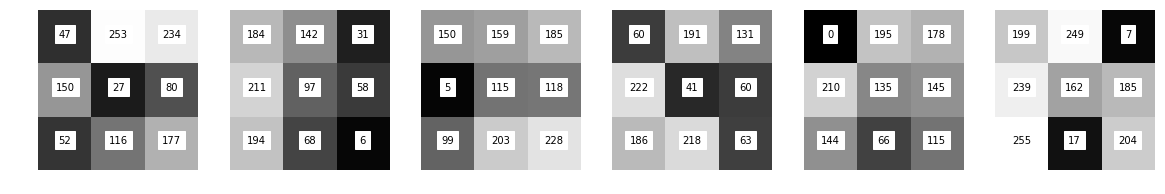

In [11]:
plot_filter_coefs('Conv1', model)

## Cambio pesos

In [12]:
weights = model.get_weights()
weights[0].shape

(3, 3, 1, 6)

In [13]:
weights[0][:,:,0,0] = np.array([[0, 0, 0], [0 , 1,  0], [0, 0, 0]])
weights[0][:,:,0,1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,2] = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
weights[0][:,:,0,3] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).T
weights[0][:,:,0,4] = np.array([[-1,-1, 0], [-1 , 0,  1], [0, 1, 1]])
weights[0][:,:,0,5] = np.array([[1 , 1,  1], [1, 1, 1], [1, 1, 1]])
#weights[0][:,:,0,5] = np.array([[1 , 1,  0], [1, 0, 0], [0, 0, 0]])
# weights[0][:,:,0,5] = np.array([[1, 1, 1], [1 , 1,  1], [1, 1, 1]])
# Normalizo
weights[0] = weights[0]/np.sqrt((weights[0]*weights[0]).sum(axis=0).sum(axis=0))
model.set_weights(weights)

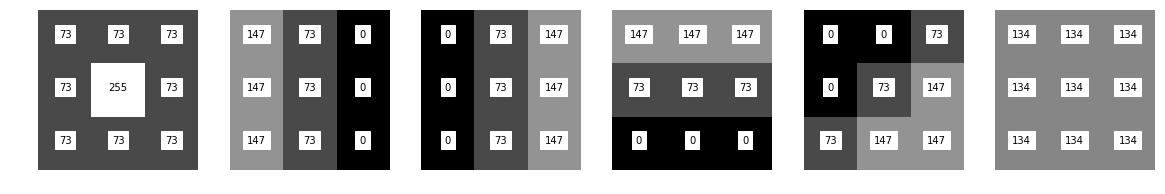

In [14]:
plot_filter_coefs('Conv1', model, normalize=True)

In [15]:
images_to_filter = np.load('images_to_filter.npy')

In [16]:
activations_output = model.predict(images_to_filter)
print(activations_output.shape)

(5, 26, 26, 6)


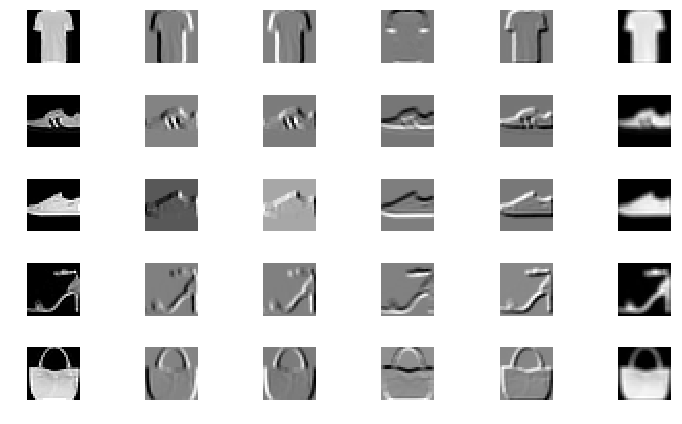

In [17]:
plot_activations(activations_output)

## Relu

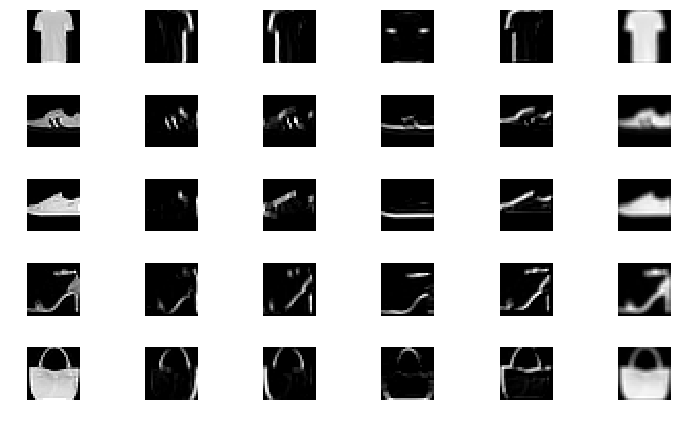

In [26]:
model_relu = get_simple_model('relu')
model_relu.set_weights(weights)
activations_output_relu = model_relu.predict(images_to_filter)
plot_activations(activations_output_relu)

## Sigmoidea

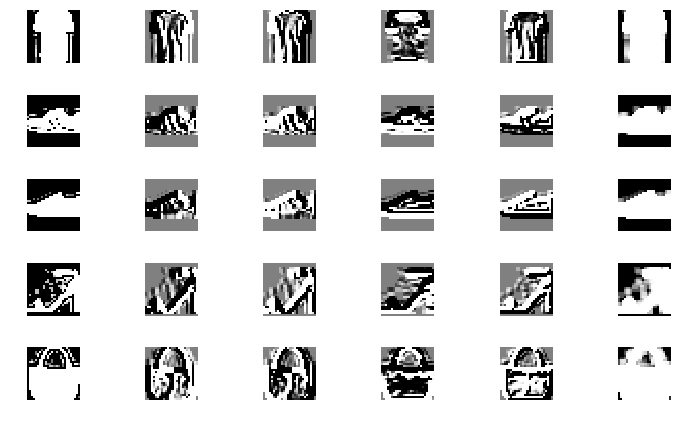

In [27]:
model_sigmoid = get_simple_model('sigmoid')
model_sigmoid.set_weights(weights)
activations_output_sigmoid = model_sigmoid.predict(images_to_filter)
plot_activations(activations_output_sigmoid)

## Sigmoidea normalizando

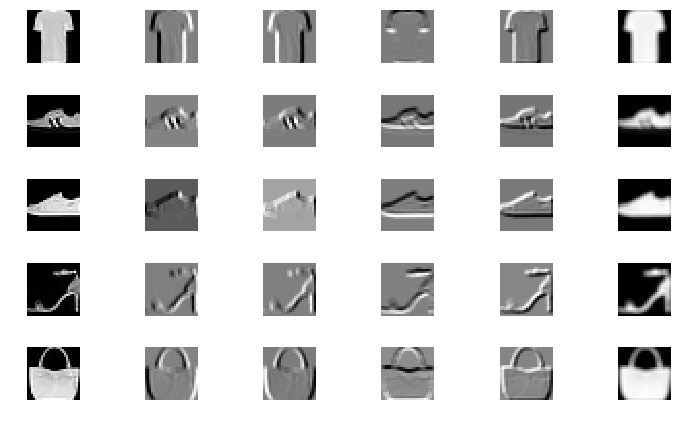

In [28]:
model_sigmoid_2 = get_simple_model('sigmoid')
weights2 = weights.copy()
weights2[0] = weights2[0]/256
model_sigmoid_2.set_weights(weights2)
activations_output_sigmoid = model_sigmoid_2.predict(images_to_filter)
plot_activations(activations_output_sigmoid)

## Imagen artificial

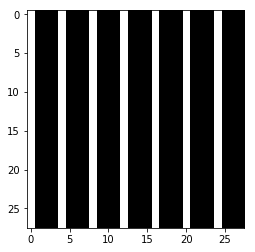

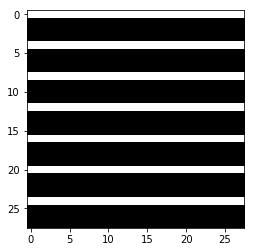

In [21]:
test_image = np.zeros([2, 28,28])
for i in range(28):
    for j in range(28):
        if j%4 == 0:
            test_image[0, i,j] = 1
        if i%4 == 0:
            test_image[1, i,j] = 1
plt.imshow(test_image[0,:,:], cmap = 'gray')
plt.show()
plt.imshow(test_image[1,:,:], cmap = 'gray')
plt.show()

(2, 26, 26, 6)


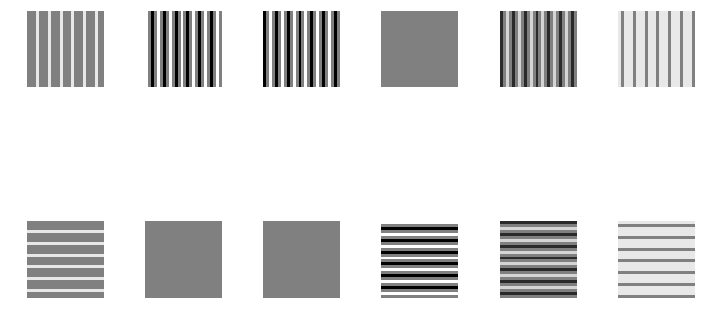

In [22]:
activations_output = model.predict(test_image.reshape(2,28,28,1))
print(activations_output.shape)
plot_activations(activations_output, relative=True)

## Modelo aprendido

In [38]:
from cnn_models import get_model, get_model_2, get_model_3, get_model_4, get_model_5

In [74]:
model_trained = get_model_5()
model_trained.load_weights('cnn-5.hdf5')

In [75]:
conv1_layer = model_trained.get_layer('Conv1')

In [76]:
conv1_weights = conv1_layer.get_weights()
conv1_weights[0].shape

(3, 3, 1, 6)

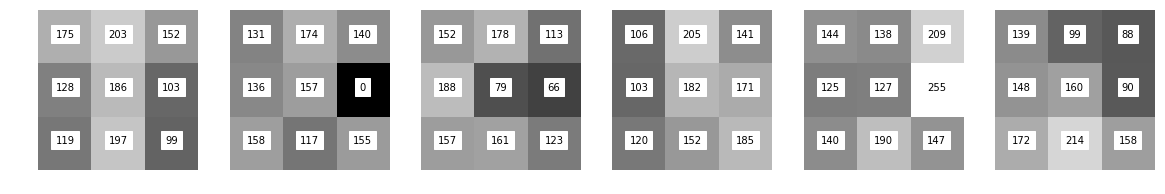

In [78]:
plot_filter_coefs('Conv1', model_trained, normalize=True)

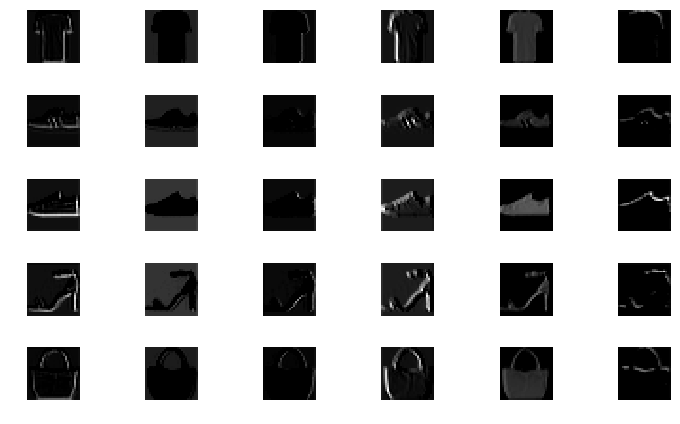

In [79]:
from keras.models import Model

intermediate_layer_conv1 = Model(inputs=model_trained.input,
                                 outputs=model_trained.get_layer('Relu1').output)
conv1_output = intermediate_layer_conv1.predict(images_to_filter)
plot_activations(conv1_output, relative=True)

## Salida de convolucionales mas adelante

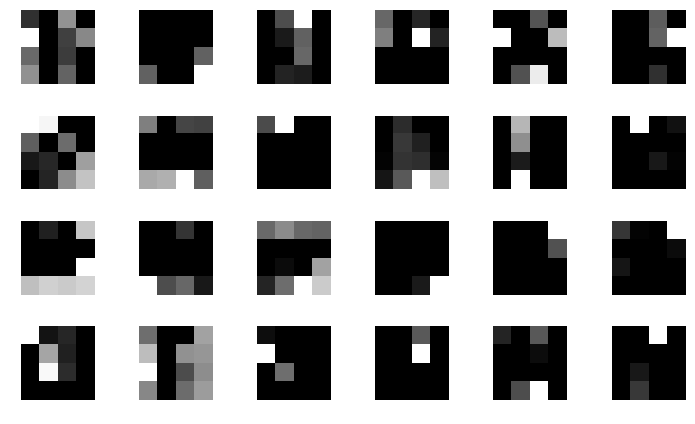

In [80]:
layer = 'MaxPool2'
intermediate_layer_conv2 = Model(inputs=model_trained.input,
                                 outputs=model_trained.get_layer(layer).output)
conv2_output = intermediate_layer_conv2.predict(x_train[110:114])
plot_activations(conv2_output)

## Random image

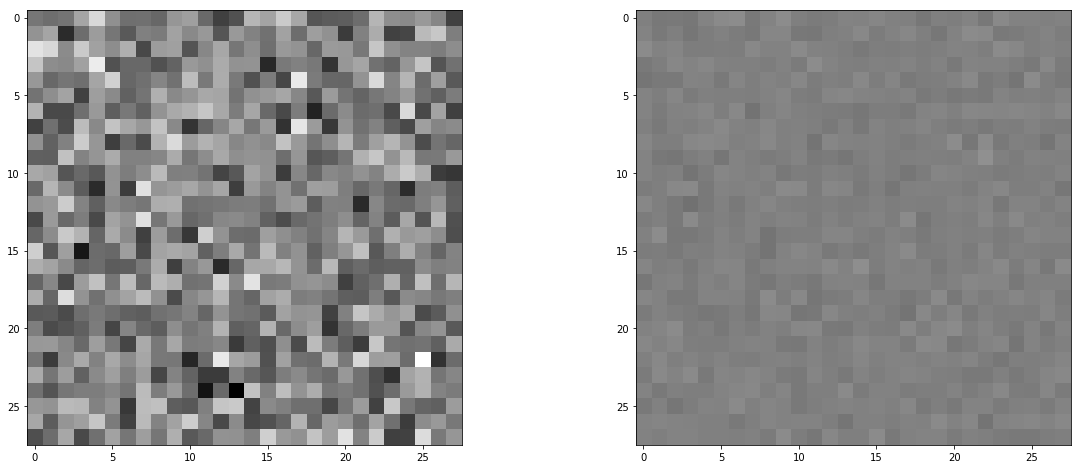

In [94]:
input_img_data_1 = generate_random_image(40)
input_img_data_2 = generate_random_image(5)
f, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].imshow(input_img_data_1[0,:,:,0], cmap = 'gray', vmin=0, vmax= 255)
ax[1].imshow(input_img_data_2[0,:,:,0], cmap = 'gray', vmin=0, vmax= 255)
plt.show()

In [86]:
model_trained.get_layer('Conv2').get_weights()[0].shape

(3, 3, 6, 12)

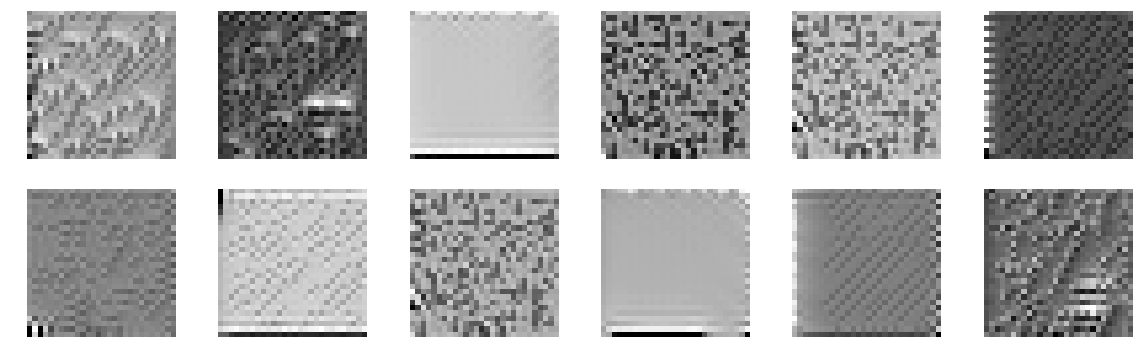

In [88]:
images = plot_conv_filters(model_trained, 'Conv2', input_img_data_1, iterations=1500, step = 10)

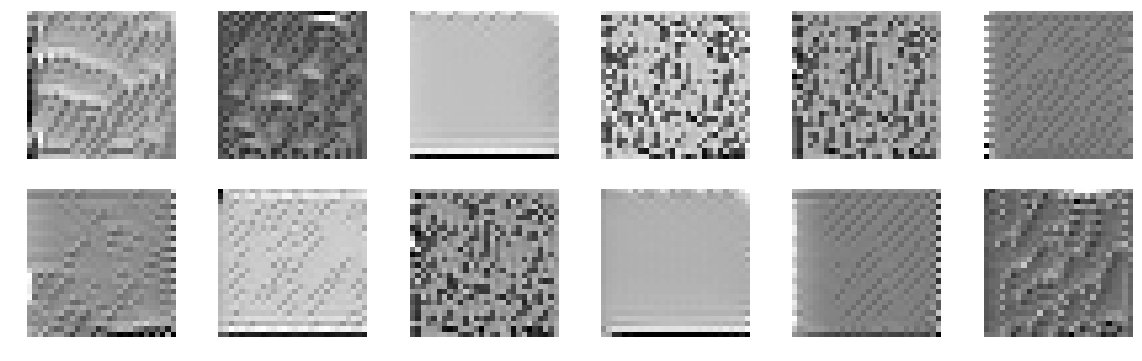

In [95]:
images = plot_conv_filters(model_trained, 'Conv2', input_img_data_2, iterations=1500, step = 100)

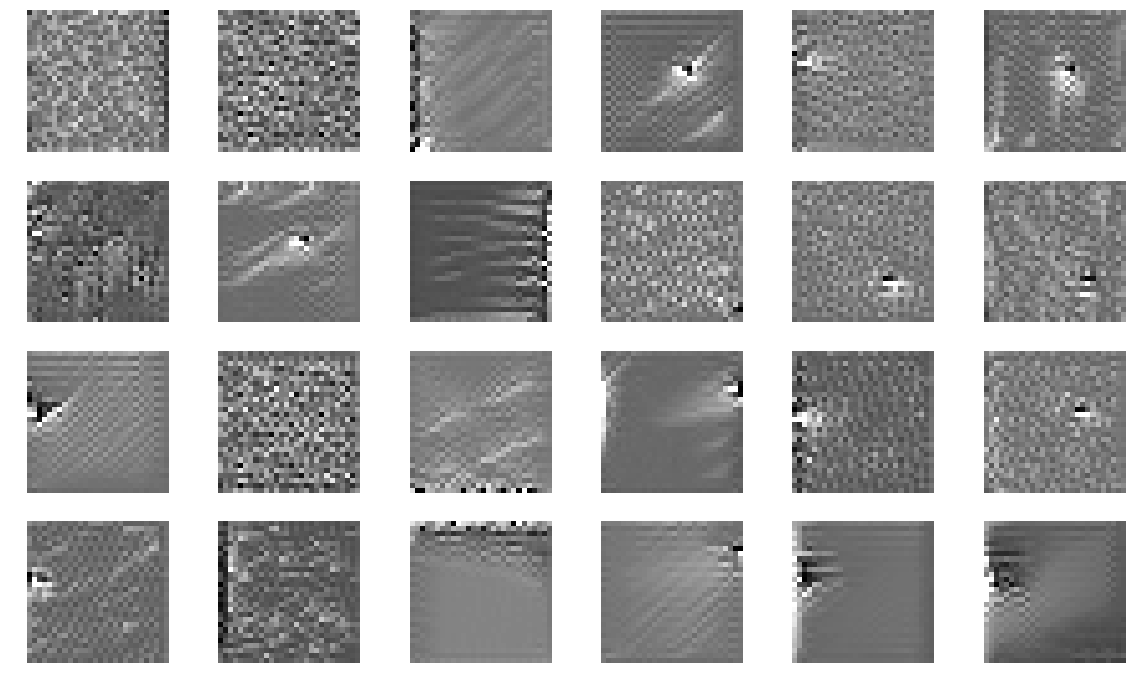

In [90]:
images = plot_conv_filters(model_trained, 'Conv3', input_img_data_1, iterations=1500, step = 100)

## Inicializo de nuevo el modelo

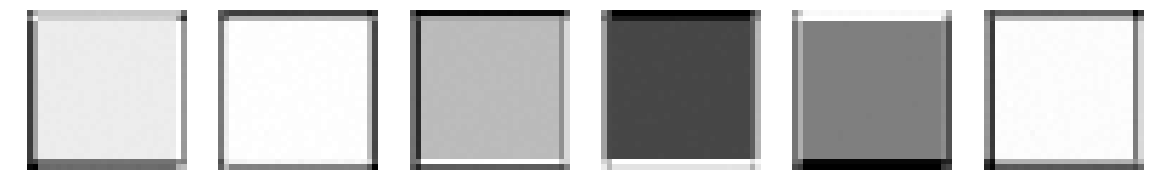

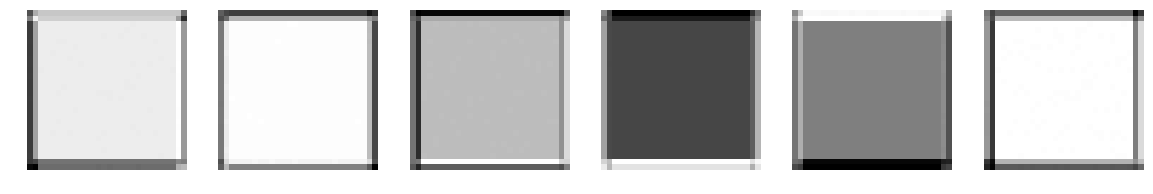

In [59]:
model_2 =get_simple_model()
_ = plot_conv_filters(model_2, 'Conv1', input_img_data_1, iterations=100, step = 100)
_ = plot_conv_filters(model_2, 'Conv1', input_img_data_2, iterations=100, step = 100)

In [60]:
model_3 = get_simple_model()

In [61]:
weights = model_3.get_weights()
print(weights[0].shape)

(3, 3, 1, 6)


In [62]:
# Agarro un filtro
weights[0][:,:,0,0].shape

(3, 3)

In [63]:
weights[0].shape

(3, 3, 1, 6)

In [65]:
weights[0][:,:,0,0] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,1] = np.array([[-1, 1, 1], [1, -1, 1], [1, 1, -1]])
#weights[2][:,:,0,1] = np.array([[-1, 1, 1], [1, -1, 1], [1, +1, -1]])
weights[0][:,:,0,2] = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]]).T
weights[0][:,:,0,3] = np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]])
weights[0][:,:,0,4] = np.array([[-1, 1, -1], [1, -1, 1], [-1, +1, -1]])
#weights[0][:,:,0,4] = np.identity(3)
weights[0][:,:,0,5] = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]])

In [67]:
plot_filter_coefs('Conv2', model_3)

KeyError: 'Conv2'

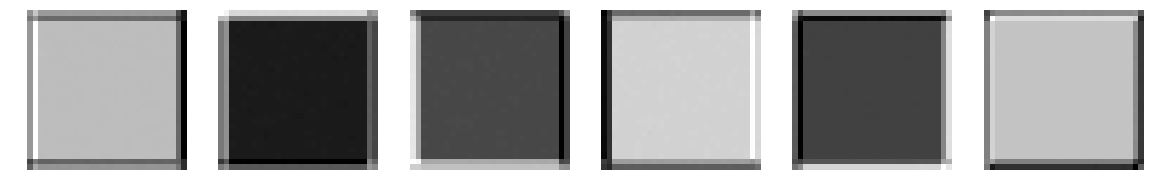

In [68]:
_ = plot_conv_filters(model_3, 'Conv1', input_img_data_1, iterations=100, step = 100)

In [69]:
_ = plot_conv_filters(model_3, 'Conv2', input_img_data_1, iterations=100, step = 100)

KeyError: 'Conv2'